In [1]:
# importing Required Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

#Suppresing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:

    # Data Ingestion
data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#Checking the shape of data
data.shape

(8124, 23)

In [4]:
# Checking the dtype of Columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# Checking for Null Values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
# Checking for duplicated Values
data.duplicated().sum()

0

In [7]:
# Checking for unique values in each column
for i in data.columns:
    print(f"\n{i} : {data[i].unique()}")


class : ['p' 'e']

cap-shape : ['x' 'b' 's' 'f' 'k' 'c']

cap-surface : ['s' 'y' 'f' 'g']

cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

bruises : ['t' 'f']

odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

gill-attachment : ['f' 'a']

gill-spacing : ['c' 'w']

gill-size : ['n' 'b']

gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

stalk-shape : ['e' 't']

stalk-root : ['e' 'c' 'b' 'r' '?']

stalk-surface-above-ring : ['s' 'f' 'k' 'y']

stalk-surface-below-ring : ['s' 'f' 'y' 'k']

stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

veil-type : ['p']

veil-color : ['w' 'n' 'o' 'y']

ring-number : ['o' 't' 'n']

ring-type : ['p' 'e' 'l' 'f' 'n']

spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']

population : ['s' 'n' 'a' 'v' 'y' 'c']

habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


Attribute Information:
classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [8]:
data = data.replace({
    "class":{'e':'edible','p':'poisonous'},
    "cap-shape":{'b':'bell','c':'conical','x':'convex','f':'flat','k':'knobbed','s':'sunken'},
    "cap-surface":{'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'},
    "cap-color":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'},
    "bruises":{'t':'yes','f':'no'},
    "odor":{'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'},
    "gill-attachment":{'a':'attached','d':'descending','f':'free','n':'notched'},
    "gill-spacing":{'c':'close','w':'crowded','d':'distant'},
    "gill-size":{'b':'broad','n':'narrow'},
    "gill-color":{'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red',
                  'w':'white','y':'yellow'},
    "stalk-shape":{'e':'enlarging','t':'tapering'},
    "stalk-root":{'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted'},
    "stalk-surface-above-ring":{'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
    "stalk-surface-below-ring":{'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
    "stalk-color-above-ring":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'},
    "stalk-color-below-ring":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'},
    "veil-type":{'p':'partial','u':'universal'},
    "veil-color":{'n':'brown','o':'orange','w':'white','y':'yellow'},
    "ring-number":{'n':'none','o':'one','t':'two'},
    "ring-type":{'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheathing','z':'zone'},
    "spore-print-color":{'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green','o':'orange','u':'purple','w':'white','y':'yellow'},
    "population":{'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'},
    "habitat":{'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'}  
})

In [9]:
data['stalk-root'] = data['stalk-root'].replace(to_replace='?',value=data['stalk-root'].value_counts().idxmax())

In [10]:
data['stalk-root'].unique()

array(['equal', 'club', 'bulbous', 'rooted'], dtype=object)

In [11]:
data['stalk-root'].value_counts().idxmax()

'bulbous'

In [12]:
old_columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

new_columns = ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat']
data.rename(columns=dict(zip(old_columns, new_columns)), inplace=True)

In [13]:
data = data.drop(['veil_type'],axis=1)

In [14]:
for i in data.columns:
    print(i,":",data[i].nunique(),"\n",data[i].unique(),"\n")

class : 2 
 ['poisonous' 'edible'] 

cap_shape : 6 
 ['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical'] 

cap_surface : 4 
 ['smooth' 'scaly' 'fibrous' 'grooves'] 

cap_color : 10 
 ['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green'] 

bruises : 2 
 ['yes' 'no'] 

odor : 9 
 ['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty'] 

gill_attachment : 2 
 ['free' 'attached'] 

gill_spacing : 2 
 ['close' 'crowded'] 

gill_size : 2 
 ['narrow' 'broad'] 

gill_color : 12 
 ['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange'] 

stalk_shape : 2 
 ['enlarging' 'tapering'] 

stalk_root : 4 
 ['equal' 'club' 'bulbous' 'rooted'] 

stalk_surface_above_ring : 4 
 ['smooth' 'fibrous' 'silky' 'scaly'] 

stalk_surface_below_ring : 4 
 ['smooth' 'fibrous' 'scaly' 'silky'] 

stalk_color_above_ring : 9 
 ['white' 'gray' 'pink' 'brown' 'buff' 'red' 'orange' 'cinnamon' 'yellow'] 

stalk_color_below_rin

In [15]:
data.to_csv("cleaned_mushrooms.csv", index=False, header=True)

In [16]:
data.columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type',
       'spore_print_color', 'population', 'habitat'],
      dtype='object')

## Univariate Analysis

### Mushroom Class

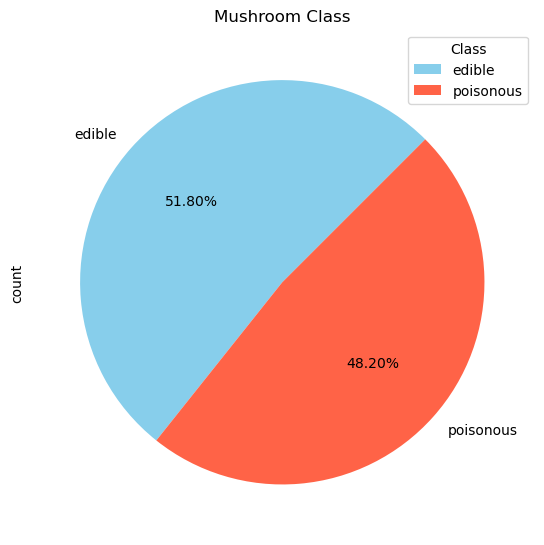

In [111]:
plt.figure(figsize=(30,10))
# class
ax1 = plt.subplot2grid((1,4),(0,0))
colors = [ '#87CEEB','#FF6347']
data['class'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=colors, startangle=45, ax=ax1)
plt.legend(title='Class', loc='best')
plt.title("Mushroom Class")
plt.show()

### Bruises

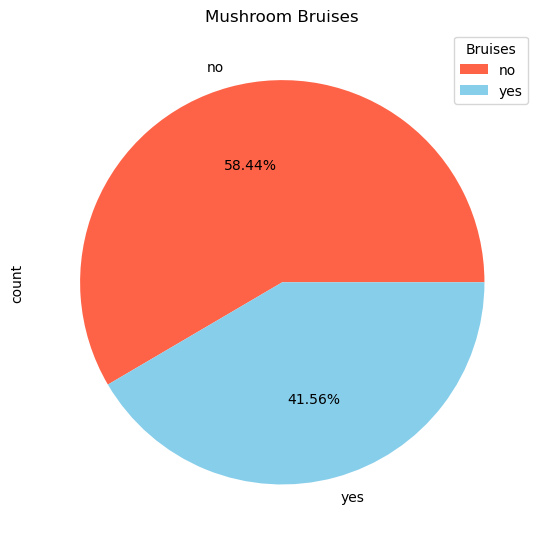

In [110]:
plt.figure(figsize=(30, 10))
ax2 = plt.subplot2grid((1, 4), (0, 1))
colors = ['#FF6347','#87CEEB']
data['bruises'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=colors, ax=ax2)
plt.legend(title='Bruises', loc='best')
plt.title("Mushroom Bruises")
plt.show()

### Odor

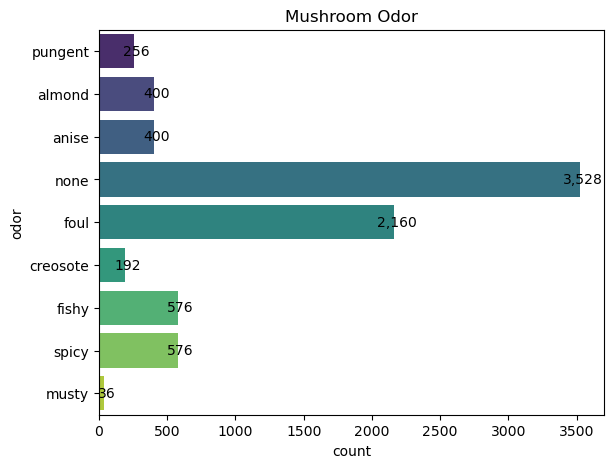

In [106]:
plt.figure(figsize=(30,5))
ax3 = plt.subplot2grid((1, 4), (0, 2))
sns.countplot(y='odor', data=data, ax=ax3, palette='viridis')
for i in ax3.patches:
    ax3.text(i.get_width() + 20, i.get_y() + i.get_height() / 2, f'{i.get_width():,.0f}', ha='center', va='center')
plt.title("Mushroom Odor")
plt.show()

### Cap_Shape

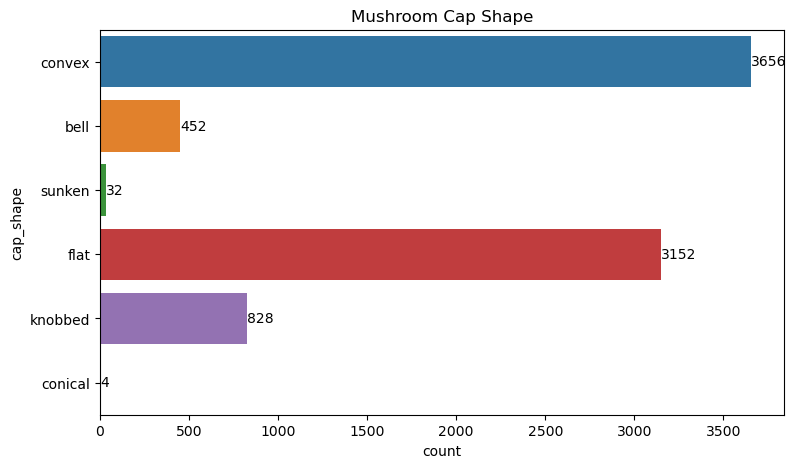

In [107]:
plt.figure(figsize=(30,5))
ax1 = plt.subplot2grid((1,3),(0,0))

sns.countplot(y="cap_shape", data=data, ax=ax1)
for i in ax1.containers:
        ax1.bar_label(i)
plt.title("Mushroom Cap Shape")
plt.show()

### Cap_Surface

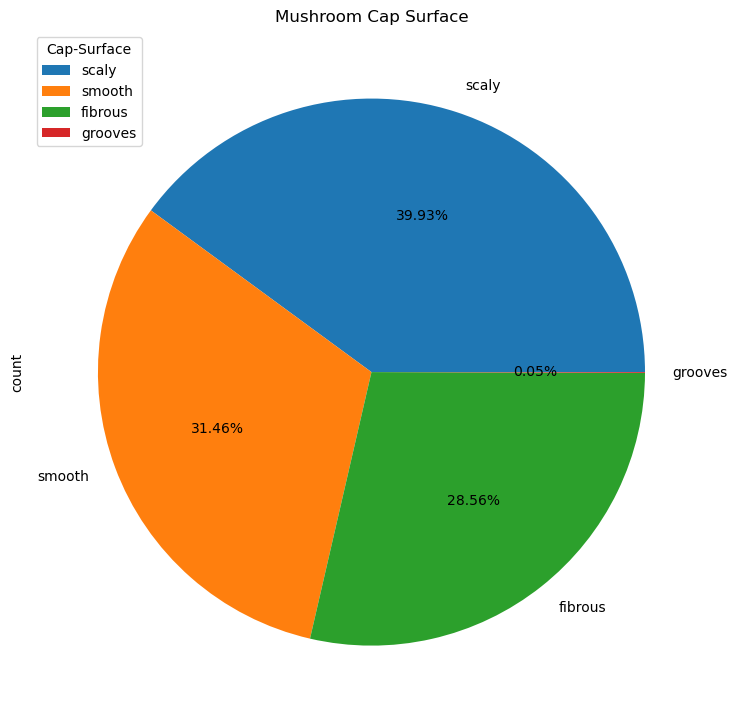

In [109]:
plt.figure(figsize=(30, 10))

# Plot the pie chart for 'cap_surface'
ax2 = plt.subplot2grid((1, 3), (0, 1))

# Use seaborn color palette for better color choices
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728']

# Plot the pie chart
data['cap_surface'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=colors, ax=ax2)

# Set legend and title
plt.legend(title='Cap-Surface', loc='upper left')
plt.title("Mushroom Cap Surface")

# Show the plot
plt.show()

### Cap_Color

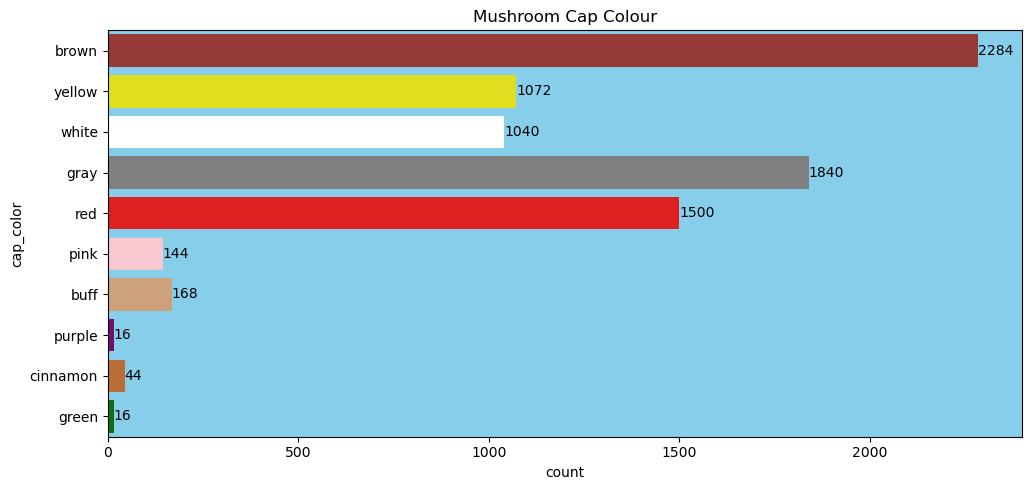

In [112]:
plt.figure(figsize=(30, 5))

# Plot the count plot for 'cap_color' using seaborn
ax3 = plt.subplot2grid((1, 3), (0, 2))

# Define a custom color palette for better color choices
custom_palette = ['#A52A2A', '#FFFF00', '#FFFFFF', '#808080', '#FF0000', '#FFC0CB', '#DAA06D',
                  '#800080', '#D2691E', '#008000']

# Use seaborn's countplot
sns.countplot(y='cap_color', data=data, ax=ax3, palette=custom_palette)

# Add labels to the bars
for i in ax3.containers:
    ax3.bar_label(i)

# Set background color
ax3.set_facecolor('skyblue')

# Set title
plt.title("Mushroom Cap Colour")

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

### Gill_Attachment

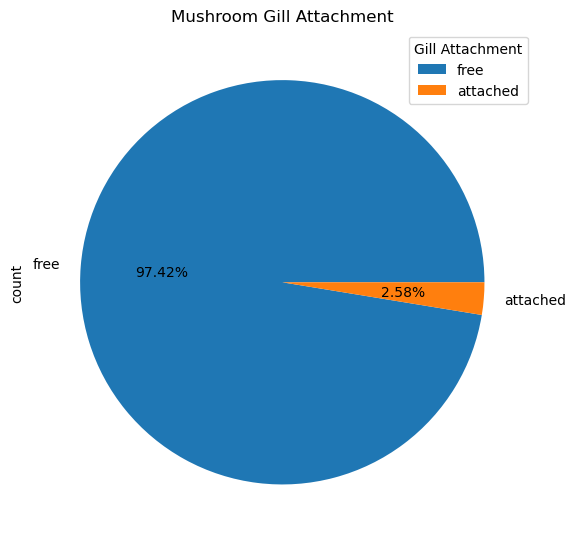

In [114]:
# Set the figure size
plt.figure(figsize=(30, 10))

# Plot the pie chart for 'gill_attachment'
ax1 = plt.subplot2grid((1, 4), (0, 0))

# Use seaborn color palette for better color choices
colors = ['#1F77B4', '#FF7F0E']

# Plot the pie chart
data['gill_attachment'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=colors, ax=ax1)

# Set legend and title
plt.legend(title='Gill Attachment', loc='best')
plt.title("Mushroom Gill Attachment")

# Show the plot
plt.show()

### Gill_Spacing

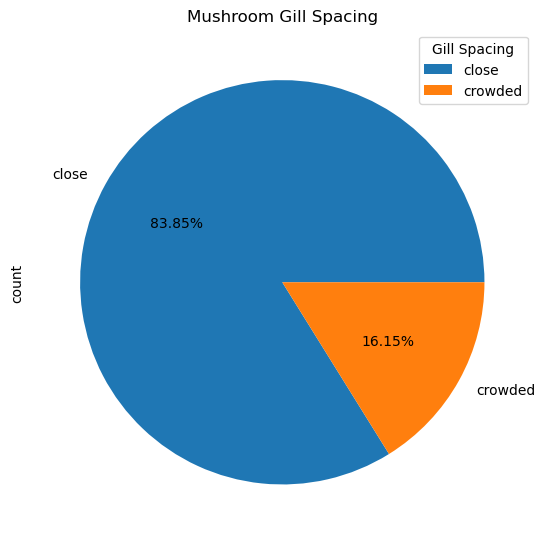

In [120]:
# Set the figure size
plt.figure(figsize=(30, 10))

# Plot the pie chart for 'gill_spacing'
ax2 = plt.subplot2grid((1, 4), (0, 1))

# Use seaborn color palette for better color choices
colors = ['#1F77B4', '#FF7F0E']

# Plot the pie chart
data['gill_spacing'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=colors, ax=ax2)

# Set legend and title
plt.legend(title='Gill Spacing', loc='best')
plt.title("Mushroom Gill Spacing")

# Show the plot
plt.show()

### Gill_Size

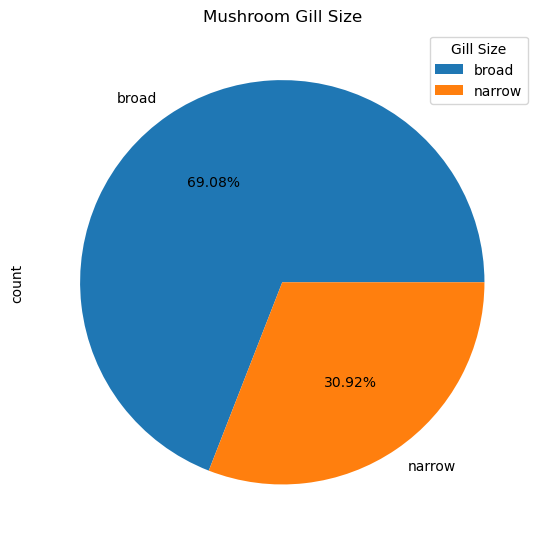

In [121]:
plt.figure(figsize=(30,10))
# Plot the pie chart for 'gill_size' without shadow
ax3 = plt.subplot2grid((1, 4), (0, 2))

# Use seaborn color palette for better color choices
colors = ['#1F77B4', '#FF7F0E']

# Plot the pie chart without shadow
data['gill_size'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=colors, ax=ax3)

# Set legend and title
plt.legend(title='Gill Size', loc='best')
plt.title("Mushroom Gill Size")

# Show the plot
plt.show()

### Gill_Color

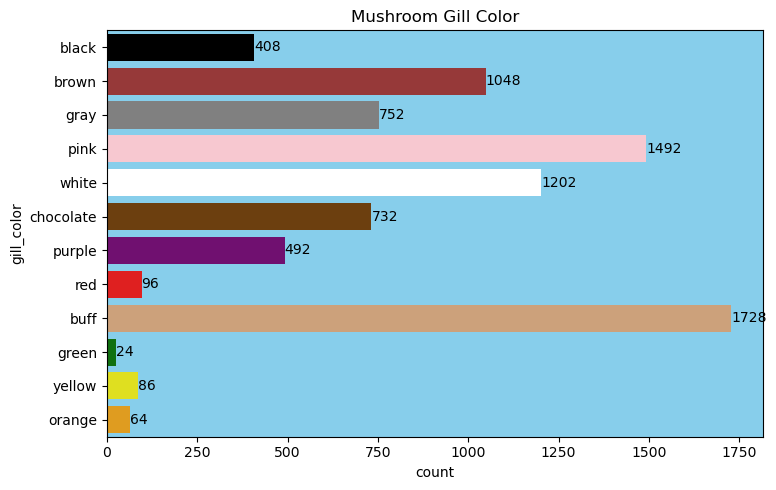

In [46]:

plt.figure(figsize=(30,5))
ax4 = plt.subplot2grid((1,4),(0,3))

sns.countplot(y='gill_color', data=data, ax=ax4, 
              palette=['#000000','#A52A2A','#808080','#FFC0CB','#FFFFFF','#7B3F00','#800080','#FF0000','#DAA06D','#008000',
                       '#FFFF00','#FFA500'])
for i in ax4.containers:
        ax4.bar_label(i)
ax4.set_facecolor('skyblue')
plt.title("Mushroom Gill Color")

plt.tight_layout()
plt.show()

### Stalk_Shape

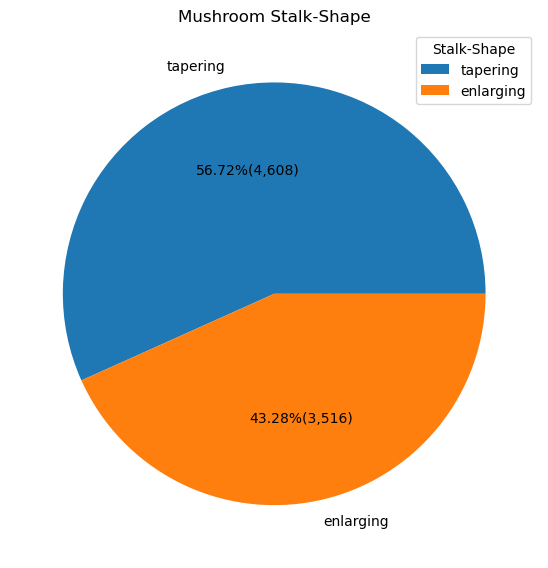

In [117]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((1,2),(0,0))

dataStalkShape = data['stalk_shape'].value_counts().values
labelStalkShape = data['stalk_shape'].value_counts().index

plt.pie(x=dataStalkShape, labels=labelStalkShape,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataStalkShape)/100), )
plt.legend(labelStalkShape, loc='best', title='Stalk-Shape')
plt.title("Mushroom Stalk-Shape")
plt.show()

### Stalk_Root

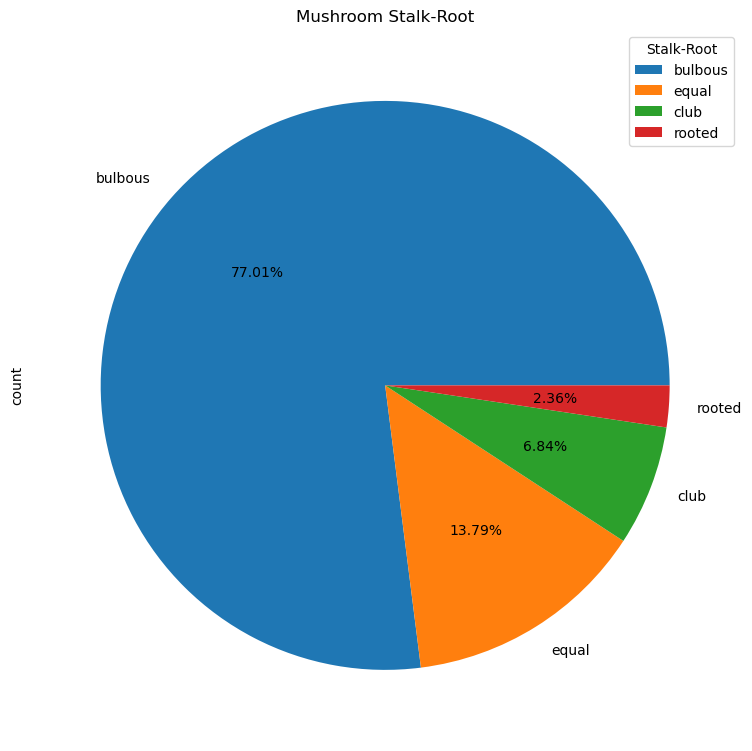

In [123]:
plt.figure(figsize=(15,10))
# Plot the pie chart for 'stalk_root'
ax2 = plt.subplot2grid((1, 2), (0, 1))

# Use seaborn color palette for better color choices
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728']

# Plot the pie chart
data['stalk_root'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=colors,ax=ax2)

# Set legend and title
plt.legend(title='Stalk-Root', loc='best')
plt.title("Mushroom Stalk-Root")

# Show the plot
plt.tight_layout()
plt.show()

### Stalk_Surface_Above_Ring

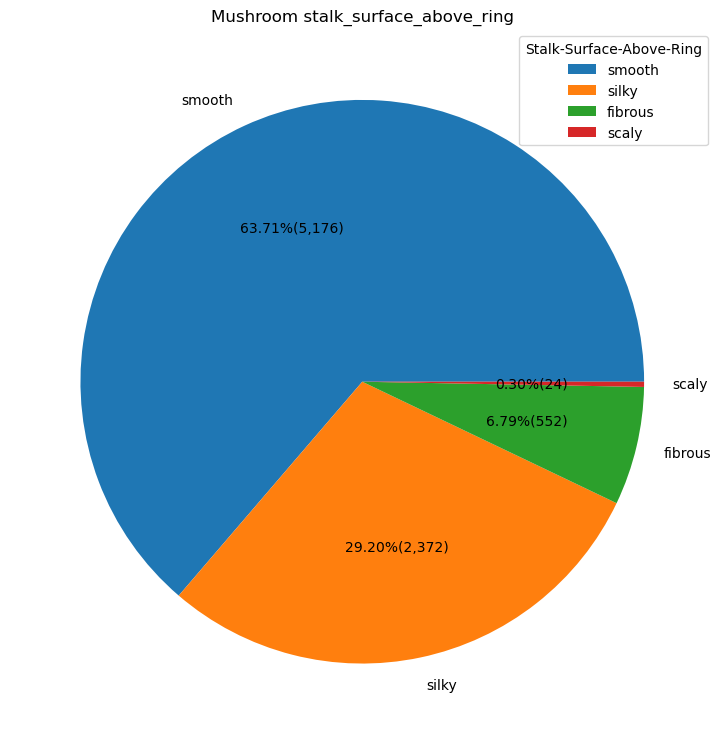

In [124]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((1,2),(0,0))

dataStalkSurfaceAboveRing = data['stalk_surface_above_ring'].value_counts().values
labelStalkSurfaceAboveRing = data['stalk_surface_above_ring'].value_counts().index

plt.pie(x=dataStalkSurfaceAboveRing, labels=labelStalkSurfaceAboveRing,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataStalkSurfaceAboveRing)/100))
plt.legend(labelStalkSurfaceAboveRing, loc='best', title='Stalk-Surface-Above-Ring')
plt.title("Mushroom stalk_surface_above_ring")
plt.show()

### Stalk_Surface_Below_Ring

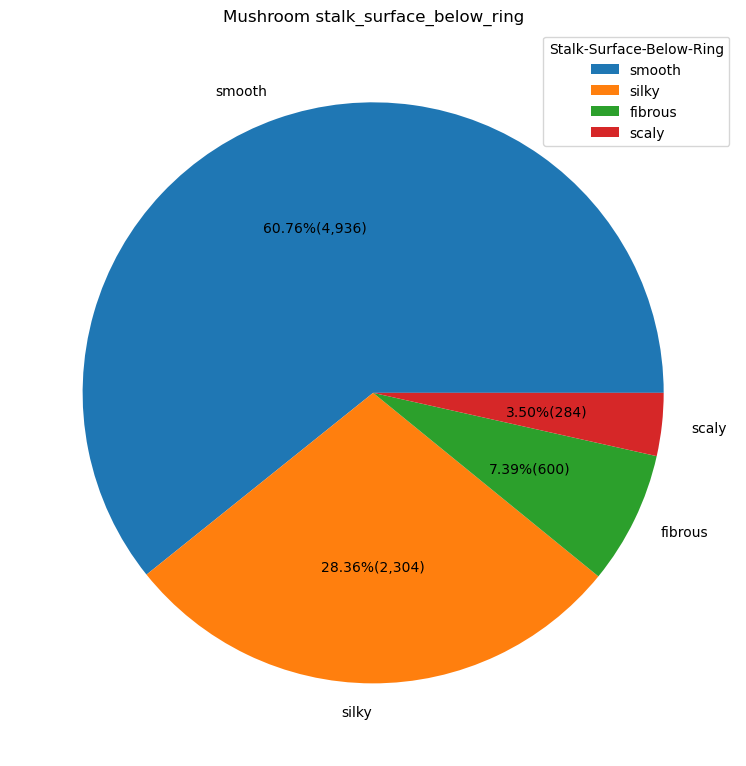

In [125]:
plt.figure(figsize=(15,10))
ax2 = plt.subplot2grid((1,2),(0,1))

dataStalkSurfaceBelowRing = data['stalk_surface_below_ring'].value_counts().values
labelStalkSurfaceBelowRing = data['stalk_surface_below_ring'].value_counts().index

plt.pie(x=dataStalkSurfaceBelowRing, labels=labelStalkSurfaceBelowRing,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataStalkSurfaceBelowRing)/100))
plt.legend(labelStalkSurfaceBelowRing, loc='best', title='Stalk-Surface-Below-Ring')
plt.title("Mushroom stalk_surface_below_ring")

plt.tight_layout()
plt.show()

### Stalk_Color_Above_Ring

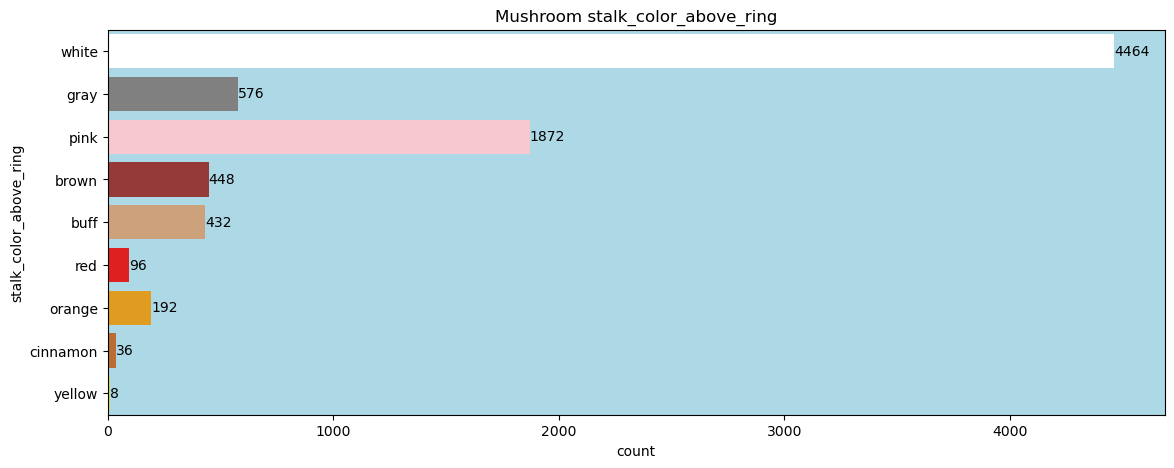

In [62]:
plt.figure(figsize=(30,5))
ax1 = plt.subplot2grid((1,2),(0,0))

sns.countplot(y='stalk_color_above_ring', data=data, ax=ax1, 
              palette=['#FFFFFF','#808080','#FFC0CB','#A52A2A','#DAA06D','#FF0000','#FFA500','#D2691E','#FFFF00'])
for i in ax1.containers:
        ax1.bar_label(i)
ax1.set_facecolor('lightblue')
plt.title("Mushroom stalk_color_above_ring")
plt.show()

### Stalk_Color_Below_Ring

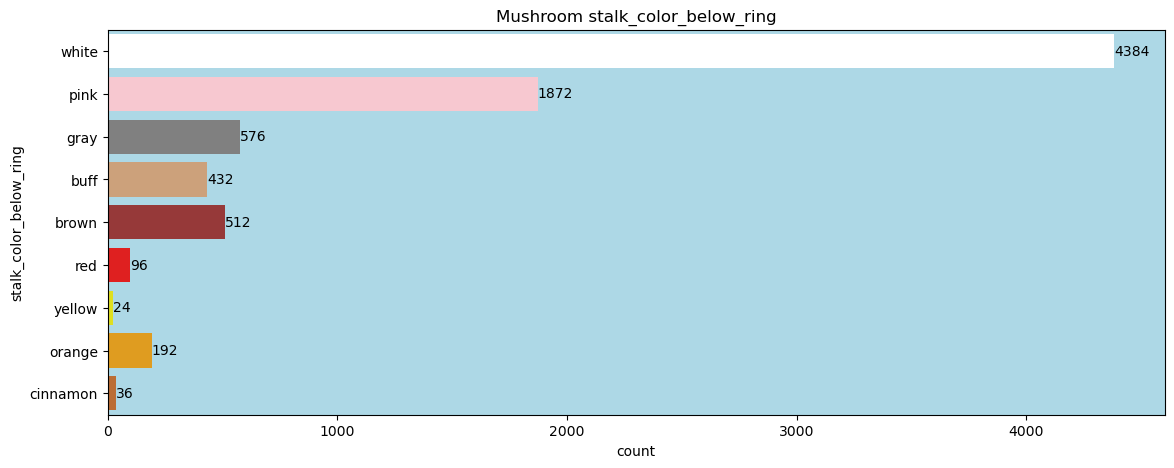

In [127]:
plt.figure(figsize=(30,5))
ax2 = plt.subplot2grid((1,2),(0,1))

sns.countplot(y='stalk_color_below_ring', data=data, ax=ax2, 
              palette=['#FFFFFF','#FFC0CB','#808080','#DAA06D','#A52A2A','#FF0000','#FFFF00','#FFA500','#D2691E'])
for i in ax2.containers:
        ax2.bar_label(i)
ax2.set_facecolor('lightblue')
plt.title("Mushroom stalk_color_below_ring")
plt.show()

### Veil_Color

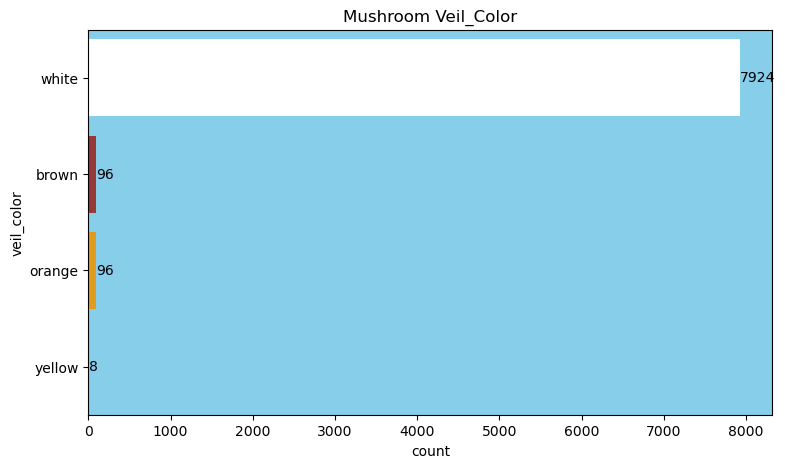

In [66]:
# veil_color
plt.figure(figsize=(30,5))
ax1 = plt.subplot2grid((1,3),(0,0))

sns.countplot(y='veil_color', data=data, ax=ax1, palette=['#FFFFFF','#A52A2A','#FFA500','#FFFF00'])
for i in ax1.containers:
    ax1.bar_label(i)
ax1.set_facecolor('skyblue')
plt.title("Mushroom Veil_Color")
plt.show()

### Ring_Number

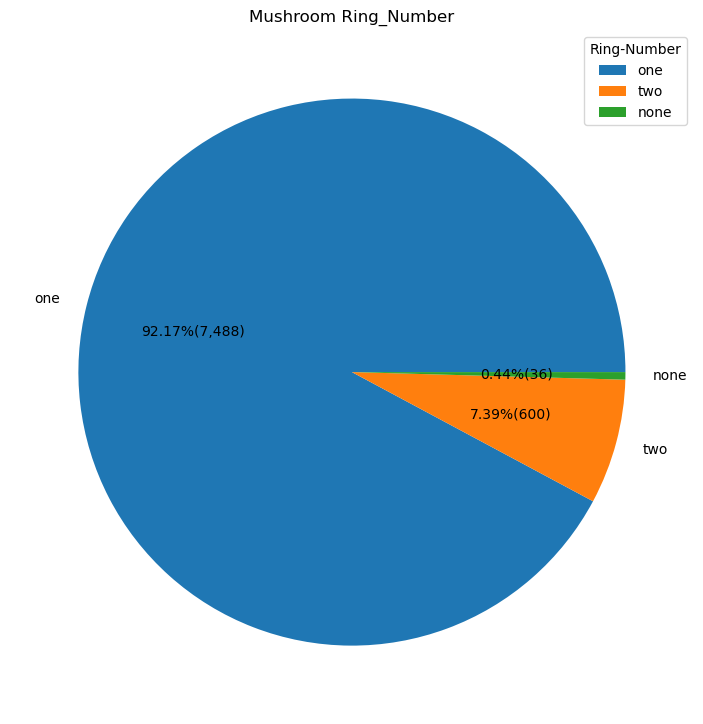

In [128]:
plt.figure(figsize=(30,10))
ax2 = plt.subplot2grid((1,3),(0,1))

dataRingNumber = data['ring_number'].value_counts().values
labelRingNumber = data['ring_number'].value_counts().index

plt.pie(x=dataRingNumber, labels=labelRingNumber,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataRingNumber)/100))
plt.legend(labelRingNumber, loc='best', title='Ring-Number')
plt.title("Mushroom Ring_Number")
plt.show()

### Ring_Type

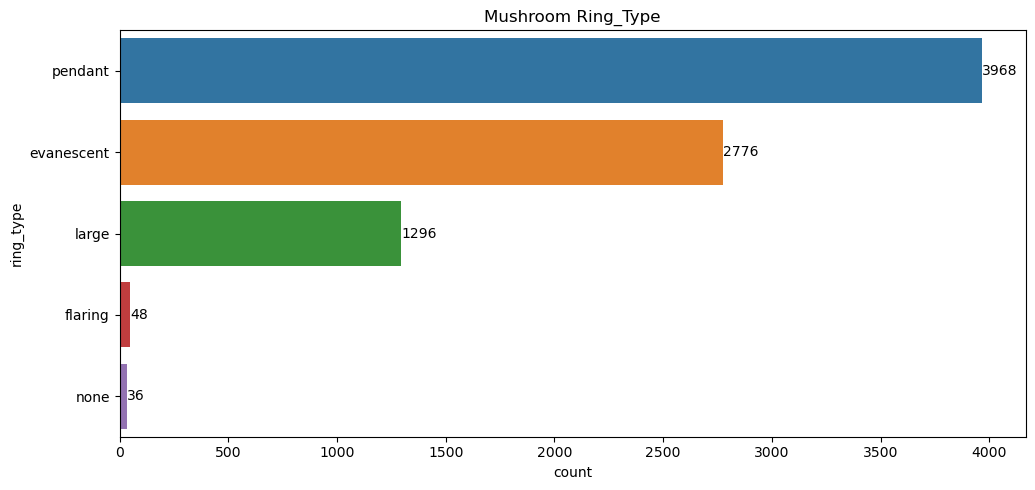

In [67]:
plt.figure(figsize=(30,5))
ax3 = plt.subplot2grid((1,3),(0,2))

sns.countplot(y='ring_type', data=data, ax=ax3)
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("Mushroom Ring_Type")

plt.tight_layout()
plt.show()

### Spore_Print_Color

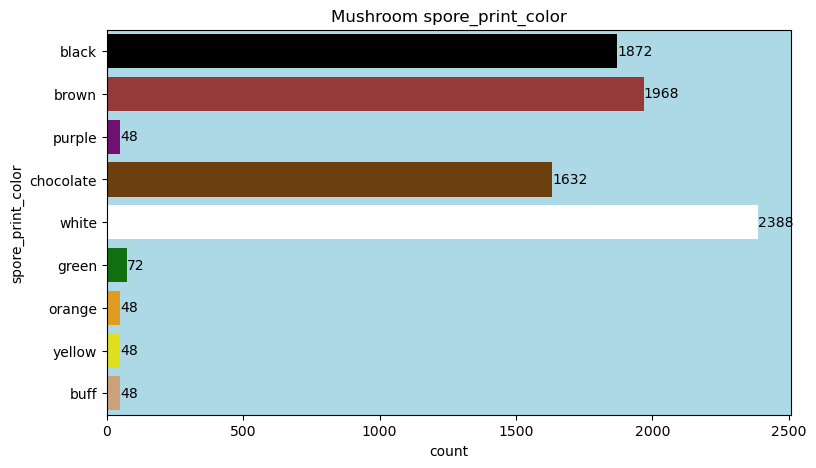

In [70]:

plt.figure(figsize=(30,5))
ax1 = plt.subplot2grid((1,3),(0,0))

sns.countplot(y='spore_print_color', data=data, ax=ax1, palette=['#000000','#A52A2A','#800080','#7B3F00','#FFFFFF',
                                                                     '#008000','#FFA500','#FFFF00','#DAA06D'])
for i in ax1.containers:
    ax1.bar_label(i)
ax1.set_facecolor('lightblue')
plt.title("Mushroom spore_print_color")
plt.show()

### Population

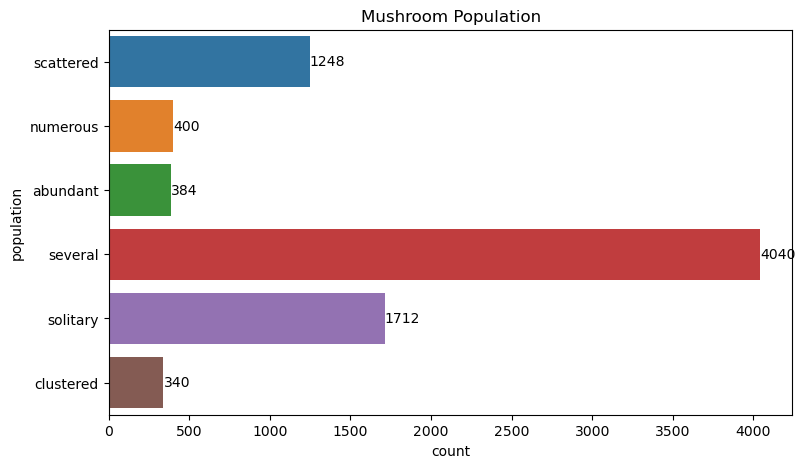

In [68]:
plt.figure(figsize=(30,5))
ax2 = plt.subplot2grid((1,3),(0,1))

sns.countplot(y='population', data=data, ax=ax2)
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("Mushroom Population")
plt.show()

### Habitat

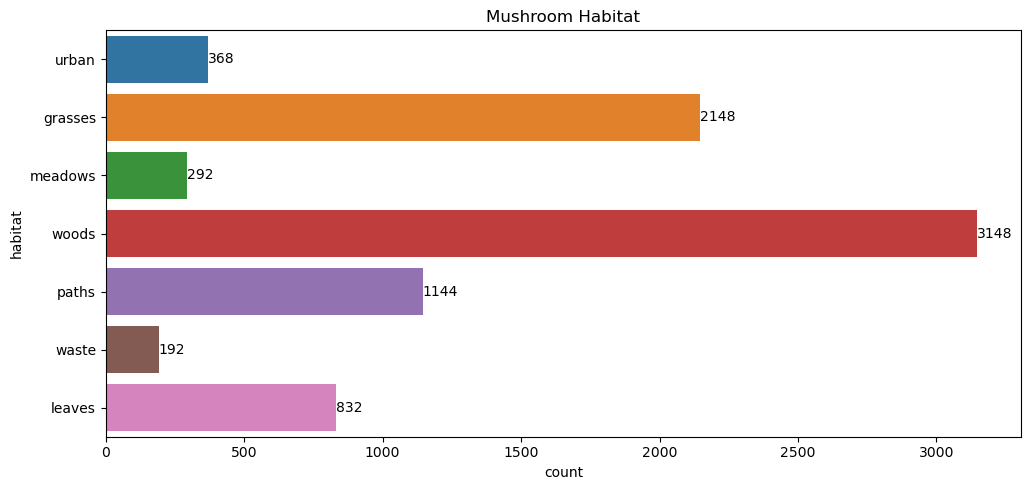

In [69]:
plt.figure(figsize=(30,5))
ax3 = plt.subplot2grid((1,3),(0,2))

sns.countplot(y='habitat', data=data, ax=ax3)
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("Mushroom Habitat")

plt.tight_layout()
plt.show()

## Insights:

##### 1. Class:

- The dataset contains two classes: 'edible' and 'poisonous.'
  
- There are 4208 instances of edible mushrooms and 3916 instances of poisonous mushrooms.

- This indicates a relatively balanced distribution between the two classes in the dataset.

##### 2. Cap Shape:

- Most mushrooms have a convex cap shape, followed by flat and knobbed shapes.

##### 3. Cap Surface:

- The majority of mushrooms have a scaly cap surface, followed by smooth and fibrous surfaces.

##### 4. Cap Color:

- Brown is the most common cap color, followed by gray and red.

- There are various less common colors like yellow, white, buff, pink, cinnamon, purple, and green.

##### 5. Bruises:

- More mushrooms in the dataset have no bruises compared to those with bruises.

##### 6. Odor:

- The majority of mushrooms have no distinct odor (none).

- Foul and fishy odors are also relatively common.

##### 7. Gill Attachment:

- Most mushrooms have free gill attachment.

##### 8. Gill Spacing:

- The majority of mushrooms have close gill spacing.

##### 9. Gill Size:

- Broad gill size is more common than narrow.

##### 10. Gill Color:

- Buff, pink, and white are the most common gill colors.

- Some mushrooms have rare colors like black, red, yellow, orange, and green.

##### 11. Stalk Shape:

- Tapering stalk shape is more common than enlarging.

##### 12. Stalk Root:

- Bulbous stalk roots are predominant.

##### 13. Stalk Surface Above Ring:

- Smooth stalk surface above the ring is most common.

##### 14. Stalk Surface Below Ring:

- Smooth stalk surface below the ring is most common.

##### 15. Stalk Color Above Ring:

- White is the most common color above the ring.

##### 16. Stalk Color Below Ring:

- White is the most common color below the ring.

##### 17. Veil Color:

- Most mushrooms have a white veil color.

##### 18. Ring Number:

- Most mushrooms have one ring.

##### 19. Ring Type:

- Pendant and evanescent ring types are more common than large, flaring, or no rings.

##### 20. Spore Print Color:

- White and brown are the most common spore print colors.

##### 21. Population:

- Mushrooms with several populations are the most common.

##### 22. Habitat:

- Woods and grasses are the most common habitats.


## Bivariate Analysis

### Cap_Shape vs Class

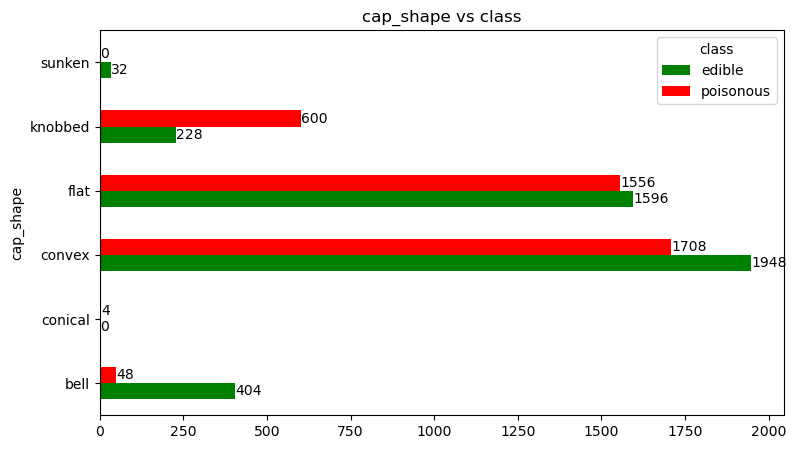

In [74]:
CapShapeClass = data.groupby(['class','cap_shape']).size().reset_index().pivot(
    columns='class',index='cap_shape',values=0).rename(columns={0:"counts"})

plt.figure(figsize=(30,5))
ax1 = plt.subplot2grid((1,3),(0,0))

CapShapeClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','red'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("cap_shape vs class")
plt.show()

### Bruises vs Class

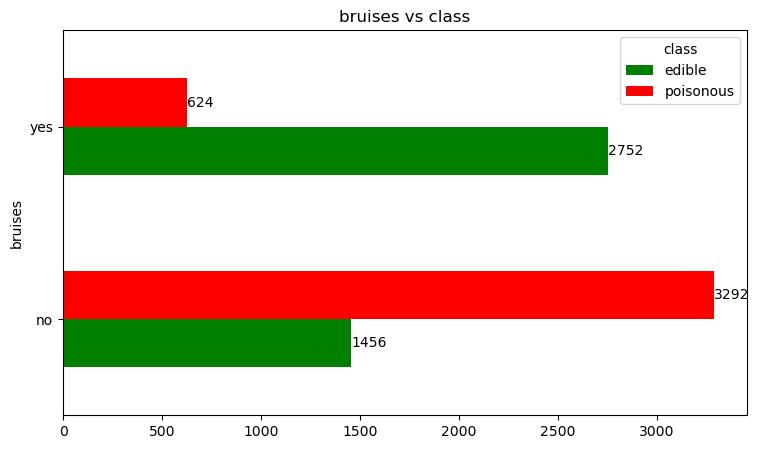

In [75]:
BruisesClass = data.groupby(['class','bruises']).size().reset_index().pivot(
    columns='class',index='bruises',values=0).rename(columns={0:"counts"})

plt.figure(figsize=(30,5))
ax2 = plt.subplot2grid((1,3),(0,1))
BruisesClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','red'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("bruises vs class")
plt.show()

### Odor vs Class

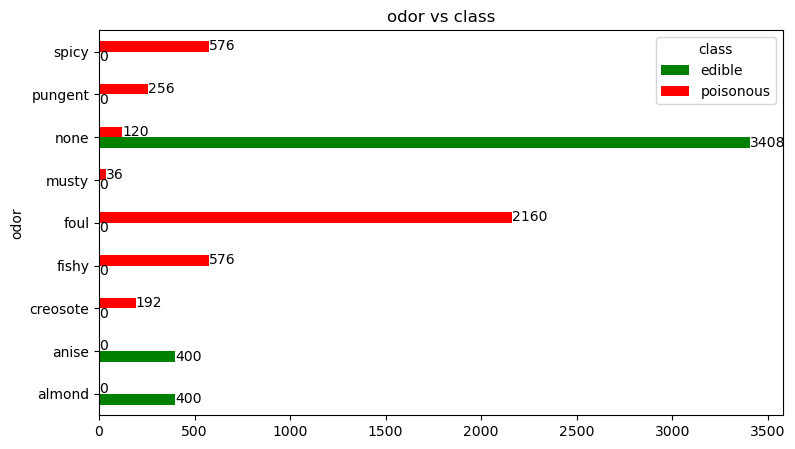

In [76]:
OdorClass = data.groupby(['class','odor']).size().reset_index().pivot(
    columns='class',index='odor',values=0).rename(columns={0:"counts"})

plt.figure(figsize=(30,5))
ax3 = plt.subplot2grid((1,3),(0,2))
OdorClass.plot(kind='barh',stacked=False,ax=ax3, color=['green','red'])
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("odor vs class")
plt.show()

### Cap_Surface vs Class

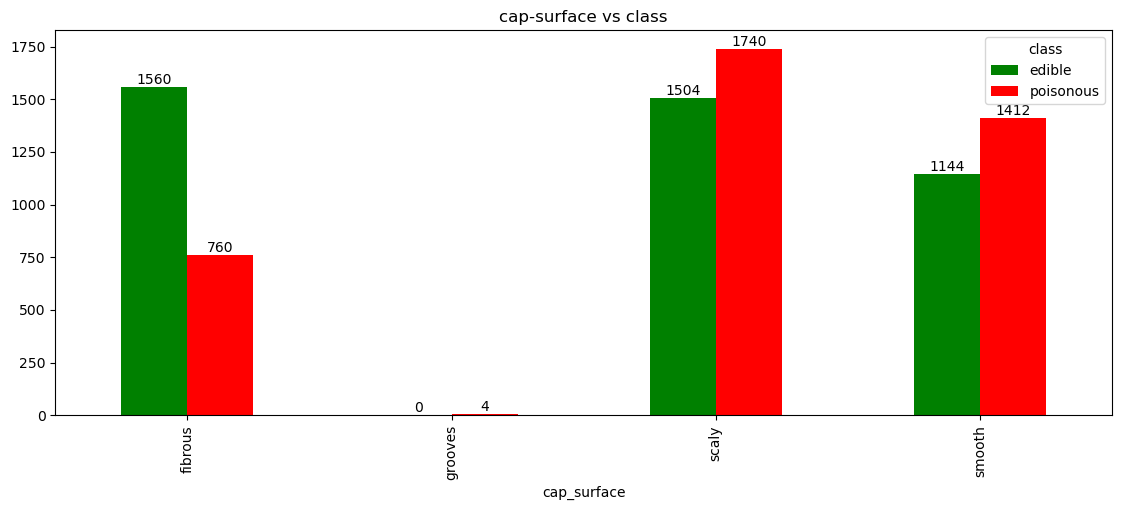

In [77]:
CapSurfaceClass = data.groupby(['class','cap_surface']).size().reset_index().pivot(
    columns='class',index='cap_surface',values=0).rename(columns={0:"counts"})

plt.figure(figsize=(30,5))
ax1 = plt.subplot2grid((1,2),(0,0))

CapSurfaceClass.plot(kind='bar',stacked=False,ax=ax1, color=['green','red'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("cap-surface vs class")
plt.show()

#### Cap_Color vs Class

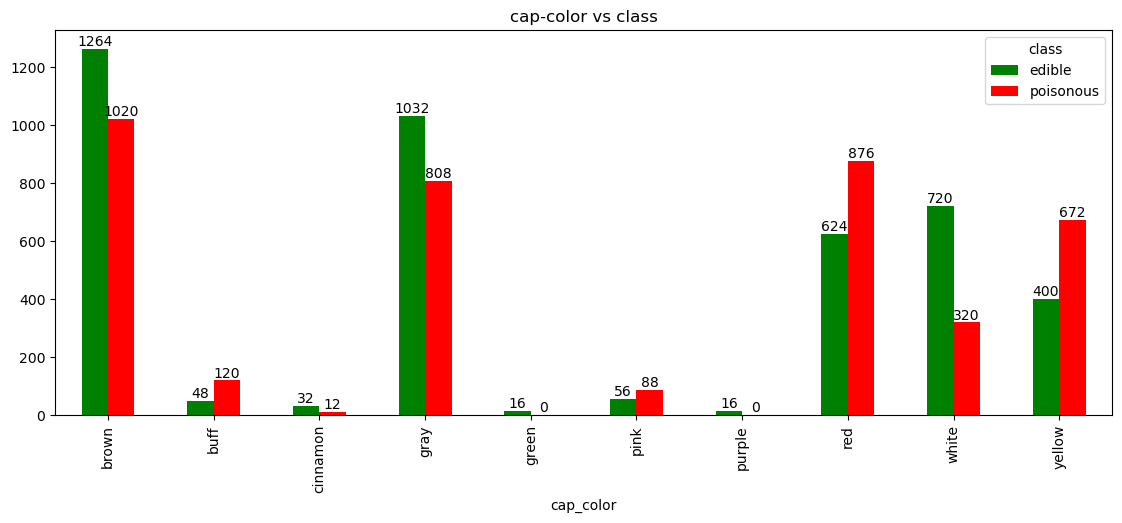

In [140]:
CapColorClass = data.groupby(['class','cap_color']).size().reset_index().pivot(
    columns='class',index='cap_color',values=0).rename(columns={0:"counts"})

plt.figure(figsize=(30,5))
ax2 = plt.subplot2grid((1,2),(0,1))

CapColorClass.plot(kind='bar',stacked=False,ax=ax2, color=['green','red'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("cap-color vs class")
plt.show()

#### Gill_Attachment Vs Class

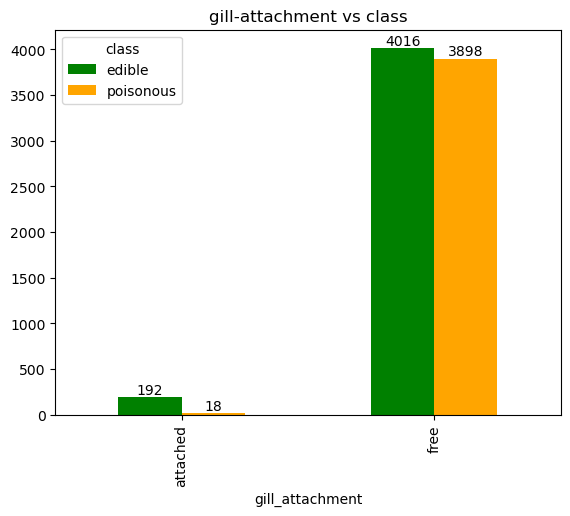

In [80]:
GillAttachmentClass = data.groupby(['class','gill_attachment']).size().reset_index().pivot(
    columns='class',index='gill_attachment',values=0).rename(columns={0:"counts"})

plt.figure(figsize=(30,5))
ax1 = plt.subplot2grid((1,4),(0,0))

GillAttachmentClass.plot(kind='bar',stacked=False,ax=ax1, color=['green','orange'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("gill-attachment vs class")
plt.show()

#### Gill_Spacing vs Class

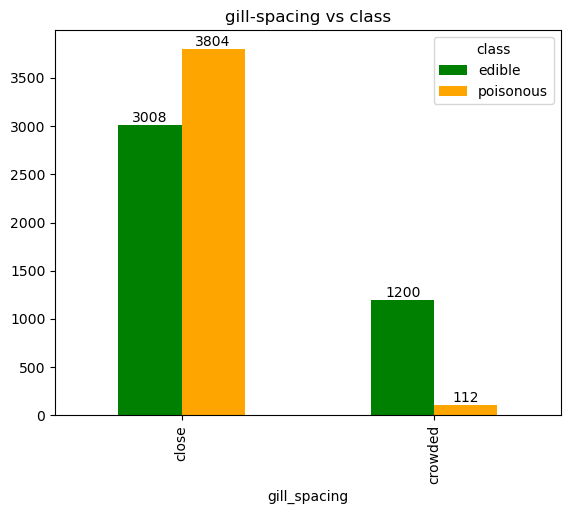

In [81]:
GillSpacingClass = data.groupby(['class','gill_spacing']).size().reset_index().pivot(
    columns='class',index='gill_spacing',values=0).rename(columns={0:"counts"})
plt.figure(figsize=(30,5))
ax2 = plt.subplot2grid((1,4),(0,1))

GillSpacingClass.plot(kind='bar',stacked=False,ax=ax2, color=['green','orange'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("gill-spacing vs class")
plt.show()

#### Gill_size vs Class

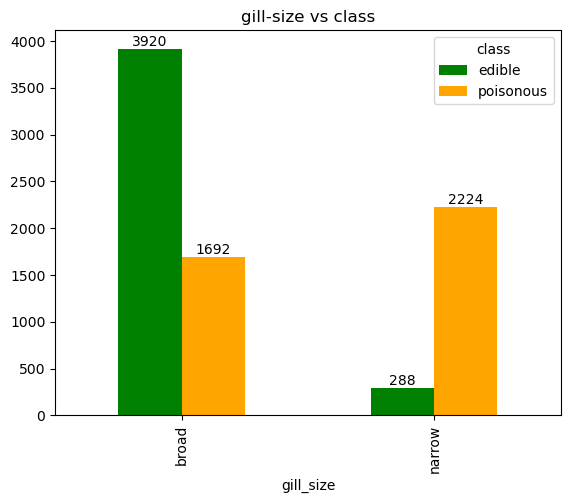

In [82]:
GillSizeClass = data.groupby(['class','gill_size']).size().reset_index().pivot(
    columns='class',index='gill_size',values=0).rename(columns={0:"counts"})
plt.figure(figsize=(30,5))
ax3 = plt.subplot2grid((1,4),(0,2))

GillSizeClass.plot(kind='bar',stacked=False,ax=ax3, color=['green','orange'])
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("gill-size vs class")
plt.show()

#### Gill_Color vs Class

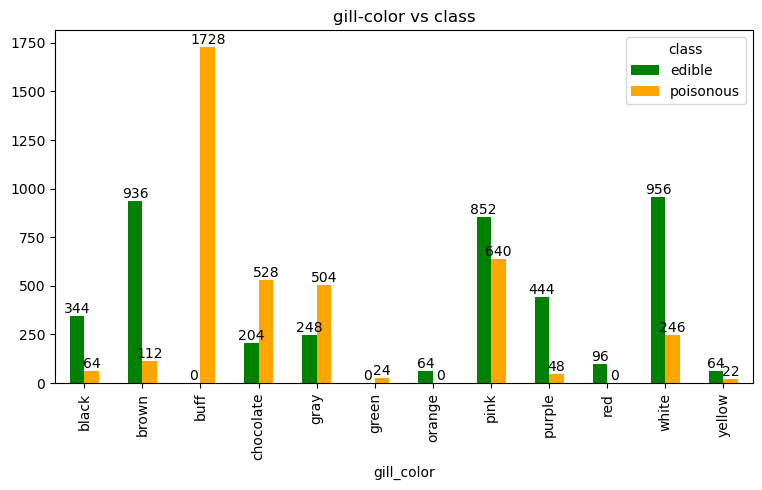

In [83]:
GillColorClass = data.groupby(['class','gill_color']).size().reset_index().pivot(
    columns='class',index='gill_color',values=0).rename(columns={0:"counts"})
plt.figure(figsize=(30,5))
ax4 = plt.subplot2grid((1,4),(0,3))

GillColorClass.plot(kind='bar',stacked=False,ax=ax4, color=['green','orange'])
for i in ax4.containers:
    ax4.bar_label(i)
plt.title("gill-color vs class")
plt.show()

#### Stalk_shape vs Class

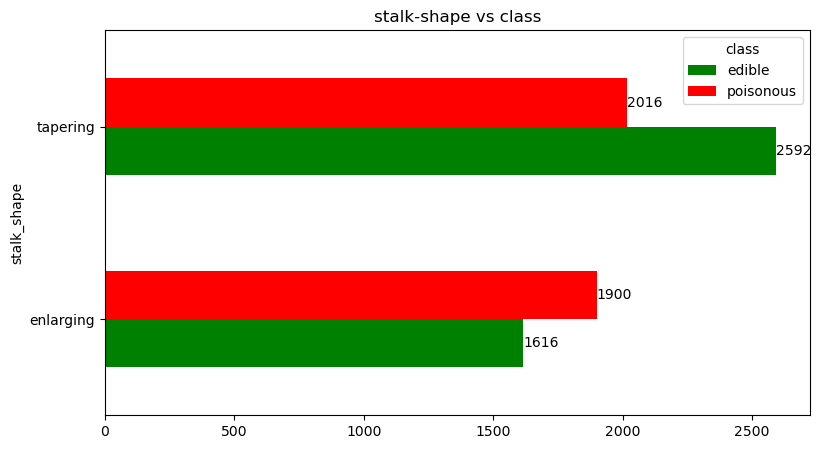

In [129]:
StalkShapeClass = data.groupby(['class','stalk_shape']).size().reset_index().pivot(
    columns='class',index='stalk_shape',values=0).rename(columns={0:"counts"})

plt.figure(figsize=(20,5))
ax1 = plt.subplot2grid((1,2),(0,0))

StalkShapeClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','red'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("stalk-shape vs class")
plt.show()

#### Stalk_Root vs Class

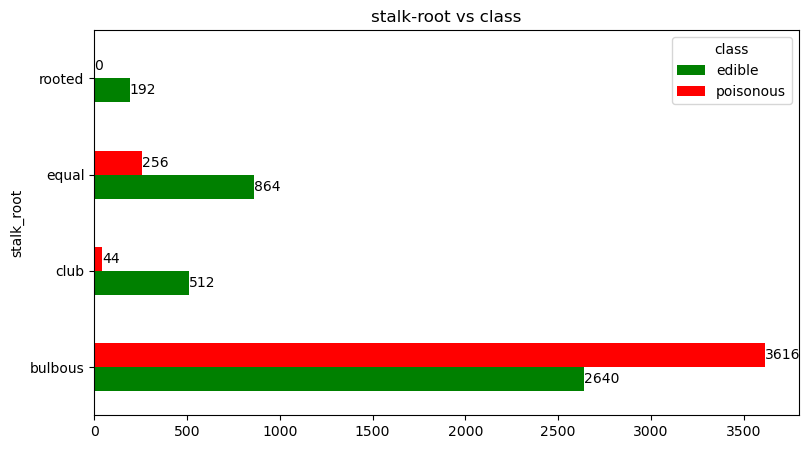

In [130]:
StalkRootClass = data.groupby(['class','stalk_root']).size().reset_index().pivot(
    columns='class',index='stalk_root',values=0).rename(columns={0:"counts"})
plt.figure(figsize=(20,5))
ax2 = plt.subplot2grid((1,2),(0,1))

StalkRootClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','red'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("stalk-root vs class")
plt.show()

#### Stalk_Surface_Above_Ring vs Class

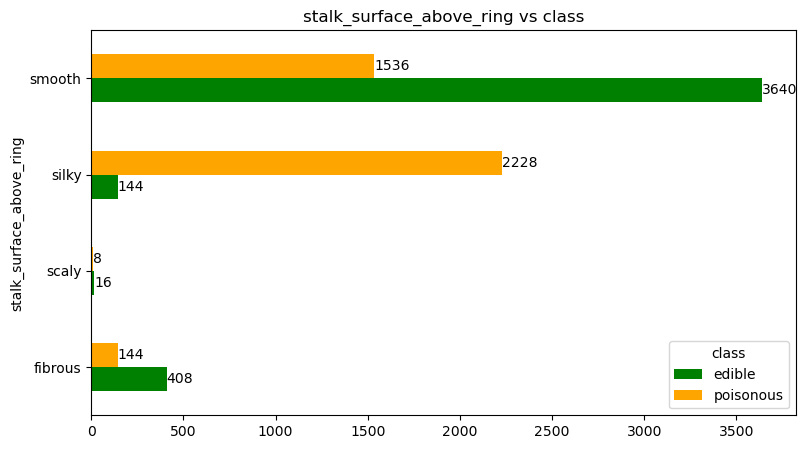

In [131]:
StalkSurfaceAboveRingClass = data.groupby(['class','stalk_surface_above_ring']).size().reset_index().pivot(
    columns='class',index='stalk_surface_above_ring',values=0).rename(columns={0:"counts"})
plt.figure(figsize=(20,5))
ax1 = plt.subplot2grid((1,2),(0,0))

StalkSurfaceAboveRingClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','orange'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("stalk_surface_above_ring vs class")
plt.show()

#### Stalk_Surface_Below_Ring vs Class

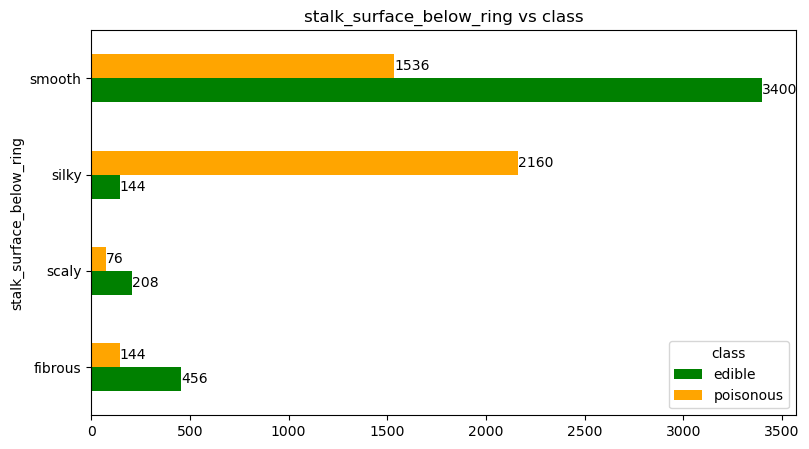

In [132]:
StalkSurfaceBelowRingClass = data.groupby(['class','stalk_surface_below_ring']).size().reset_index().pivot(
    columns='class',index='stalk_surface_below_ring',values=0).rename(columns={0:"counts"})

plt.figure(figsize=(20,5))
ax2 = plt.subplot2grid((1,2),(0,1))

StalkSurfaceBelowRingClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','orange'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("stalk_surface_below_ring vs class")

plt.show()

#### Stalk_Color_Above_Ring vs Class

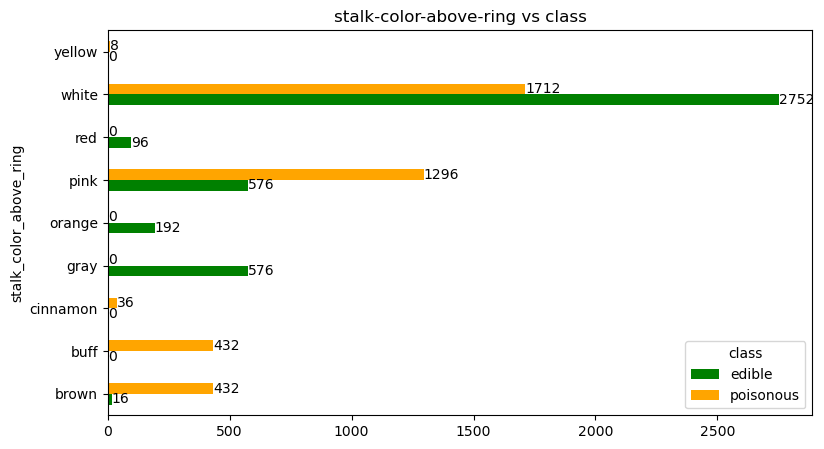

In [133]:
StalkColorAboveRingClass = data.groupby(['class','stalk_color_above_ring']).size().reset_index().pivot(
    columns='class',index='stalk_color_above_ring',values=0).rename(columns={0:"counts"})

plt.figure(figsize=(20,5))
ax1 = plt.subplot2grid((1,2),(0,0))

StalkColorAboveRingClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','orange'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("stalk-color-above-ring vs class")
plt.show()

#### Stalk_Color_Below_Ring vs Class

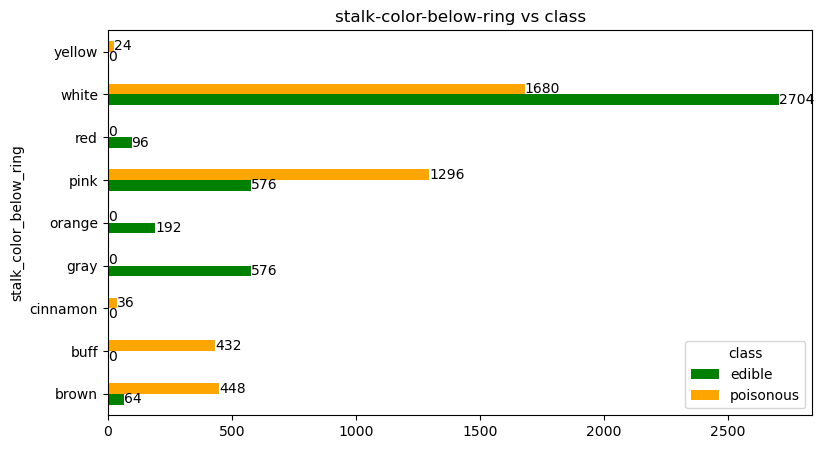

In [134]:
StalkColorBelowRingClass = data.groupby(['class','stalk_color_below_ring']).size().reset_index().pivot(
    columns='class',index='stalk_color_below_ring',values=0).rename(columns={0:"counts"})

plt.figure(figsize=(20,5))
ax2 = plt.subplot2grid((1,2),(0,1))

StalkColorBelowRingClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','orange'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("stalk-color-below-ring vs class")

plt.show()

#### Veil_Color vs Class

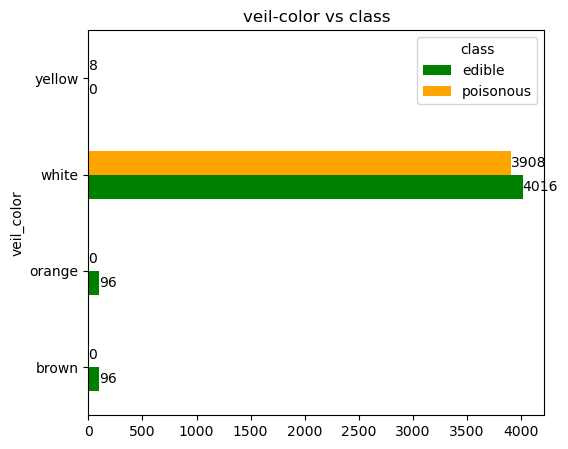

In [135]:
VeilColorClass = data.groupby(['class','veil_color']).size().reset_index().pivot(
    columns='class',index='veil_color',values=0).rename(columns={0:"counts"})

plt.figure(figsize=(20,5))
ax1 = plt.subplot2grid((1,3),(0,0))

VeilColorClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','orange'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("veil-color vs class")
plt.show()

#### Ring_Number vs Class

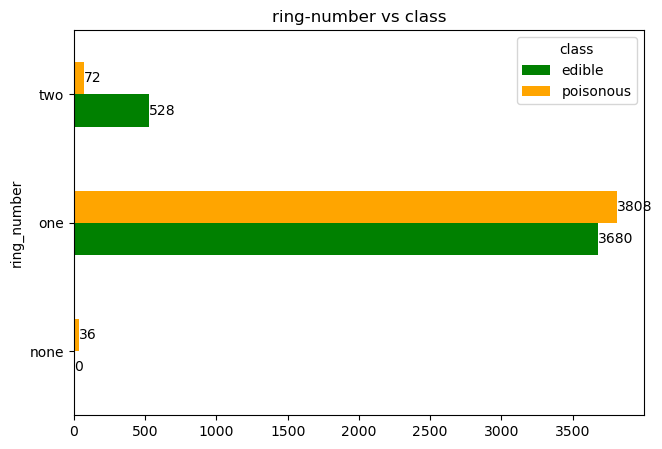

In [139]:
RingNumberClass = data.groupby(['class','ring_number']).size().reset_index().pivot(
    columns='class',index='ring_number',values=0).rename(columns={0:"counts"})

plt.figure(figsize=(25,5))
ax2 = plt.subplot2grid((1,3),(0,1))

RingNumberClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','orange'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("ring-number vs class")
plt.show()

#### Ring_Type vs Class

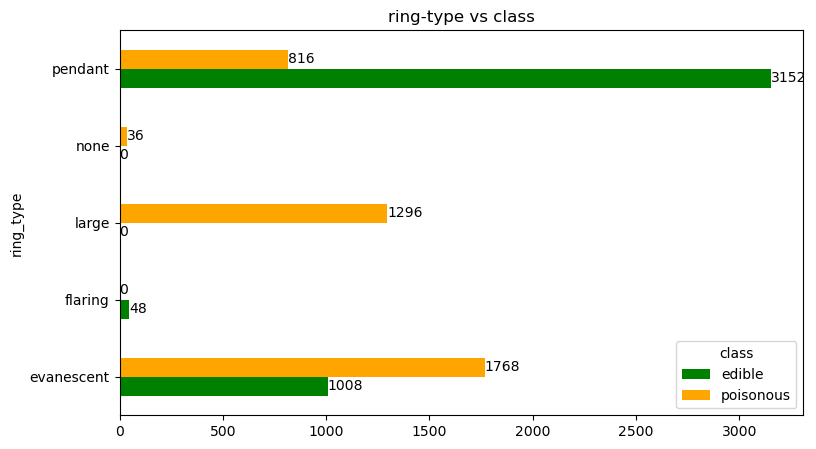

In [138]:
RingTypeClass = data.groupby(['class','ring_type']).size().reset_index().pivot(
    columns='class',index='ring_type',values=0).rename(columns={0:"counts"})

plt.figure(figsize=(30,5))
ax3 = plt.subplot2grid((1,3),(0,2))

RingTypeClass.plot(kind='barh',stacked=False,ax=ax3, color=['green','orange'])
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("ring-type vs class")
plt.show()

#### Spore_Print_Color vs Class

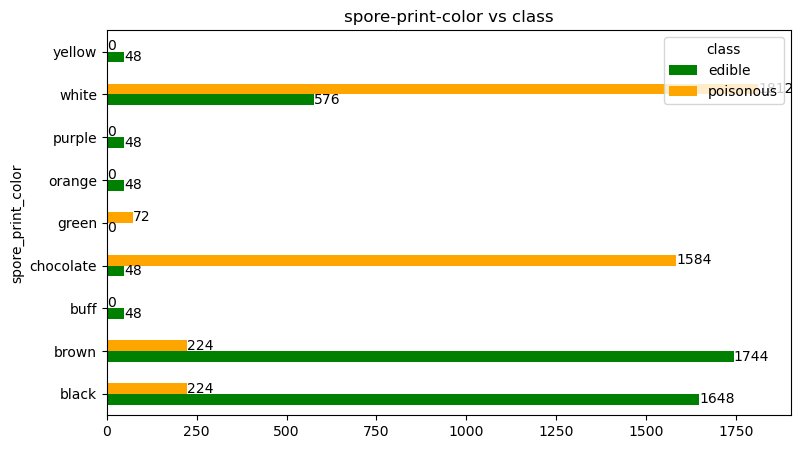

In [96]:
SporePrintColorClass = data.groupby(['class','spore_print_color']).size().reset_index().pivot(
    columns='class',index='spore_print_color',values=0).rename(columns={0:"counts"})

plt.figure(figsize=(30,5))
ax1 = plt.subplot2grid((1,3),(0,0))

SporePrintColorClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','orange'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("spore-print-color vs class")
plt.show()

#### Population vs Class

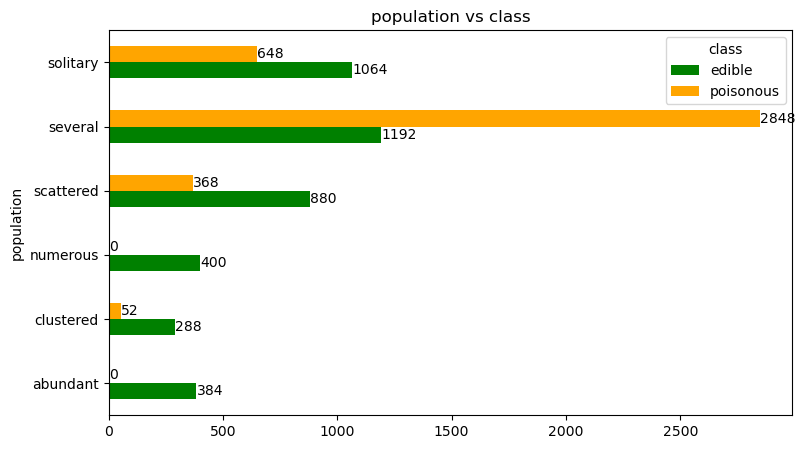

In [97]:
PopulationClass = data.groupby(['class','population']).size().reset_index().pivot(
    columns='class',index='population',values=0).rename(columns={0:"counts"})

plt.figure(figsize=(30,5))
ax2 = plt.subplot2grid((1,3),(0,1))

PopulationClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','orange'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("population vs class")
plt.show()

#### Habitat vs Class

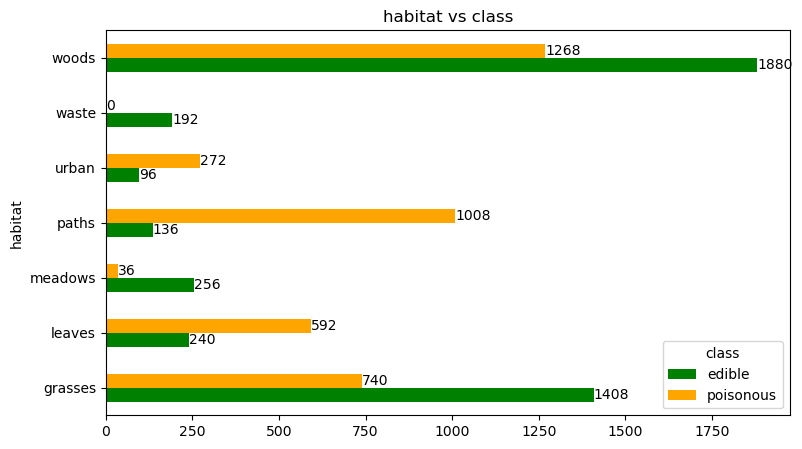

In [98]:
HabitatClass = data.groupby(['class','habitat']).size().reset_index().pivot(
    columns='class',index='habitat',values=0).rename(columns={0:"counts"})

plt.figure(figsize=(30,5))
ax3 = plt.subplot2grid((1,3),(0,2))

HabitatClass.plot(kind='barh',stacked=False,ax=ax3, color=['green','orange'])
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("habitat vs class")
plt.show()

## Insights:

### 1. Cap Shape:

- Most mushrooms with a bell-shaped cap are edible.
  
- Convex and flat-shaped caps are present in both edible and poisonous mushrooms.
  
- Knobbed caps are more likely to be poisonous.

### 2. Bruises:

- Mushrooms with bruises are more likely to be edible.
  
- Mushrooms without bruises are more likely to be poisonous.

### 3. Odor:

- Mushrooms with an almond or anise odor are likely to be edible.
  
- Mushrooms with a foul or fishy odor are likely to be poisonous.
  
- Mushrooms with no odor (none) are more likely to be edible.

### 4. Cap Surface:

- Mushrooms with a fibrous or grooved cap surface are more likely to be edible.
  
- Mushrooms with a scaly or smooth cap surface are more likely to be poisonous.

### 5. Cap Color:

- Mushrooms with a brown or buff cap color are more likely to be edible.
  
- Mushrooms with a green, purple, or yellow cap color are likely to be poisonous.

### 6. Gill Attachment:

- Mushrooms with attached gills are more likely to be edible.
  
- Mushrooms with free gills are more likely to be poisonous.

### 7. Gill Spacing:

- Mushrooms with close gill spacing are more likely to be edible.

### 8. Gill Size:

- Mushrooms with broad gill size are more likely to be edible.

### 9. Gill Color:

- Mushrooms with buff or green gill color are likely to be poisonous.
  
- Mushrooms with black, brown, pink, or white gill color are more likely to be edible.

### 10. Stalk Shape:

- Mushrooms with tapering stalk shape are more likely to be edible.

### 11. Stalk Root:

- Mushrooms with a bulbous stalk root are more likely to be edible.

### 12. Stalk Surface Above Ring:

- Mushrooms with a silky stalk surface above the ring are more likely to be poisonous.

### 13. Stalk Surface Below Ring:

- Mushrooms with a silky or smooth stalk surface below the ring are more likely to be poisonous.

### 14. Stalk Color Above Ring:

- Mushrooms with a white stalk color above the ring are more likely to be edible.

### 15. Stalk Color Below Ring:

- Mushrooms with a white stalk color below the ring are more likely to be edible.

### 16. Veil Color:

- Mushrooms with a brown or orange veil color are likely to be poisonous.

### 17. Ring Number:

- Mushrooms with no ring are more likely to be poisonous.

### 18. Ring Type:

- Mushrooms with an evanescent or pendant ring type are more likely to be edible.

### 19. Spore Print Color:

- Mushrooms with a white or brown spore print color are more likely to be edible.

### 20. Population:

- Mushrooms with abundant or numerous populations are more likely to be edible.

### 21. Habitat:

- Mushrooms in grasses, meadows, and woods are more likely to be edible.
  
- Mushrooms in paths and urban areas are more likely to be poisonous.
